# <center> Portfolio Optimization </center>
 <center> BIA-650 Group Project </center>
  <center> Liang An, Jhao-Han Chen, Xuanzhu Luo, Jiamei Wang, Ming Wei </center>
  

In [3]:
import numpy as np
import pandas as pd
import pandas_datareader.data as wb
import datetime as dt
import scipy.optimize as sco
import matplotlib.pyplot as plt
from matplotlib import style


# Select 10 Stocks From Different Sectors
1. **Energy**: XOM
2. **Materials**: BHP
3. **Industrials**: DE
4. **Utilities**: FE
5. **Information Technology**: GOOG
6. **Financials**: GS
7. **Telecommunication Services**: VZ
8. **Consumer Discretionary**:WMT
9. **Consumer Staples**: KO
10. **Health Care**: JNJ


In [4]:
stocks = ['GS','GOOG','JNJ','BHP','XOM','WMT','KO','DE','FE','VZ']
num = len(stocks)
start = dt.datetime(2006,12,29)
end = dt.datetime(2018,10,26)
data = wb.DataReader(stocks, 'yahoo', start, end)['Adj Close'] 
data.head()

Symbols,BHP,DE,FE,GOOG,GS,JNJ,KO,VZ,WMT,XOM
Date,,,,,,,,,,
2006-12-29,26.727829,36.267632,34.580856,228.752182,172.996323,46.347179,14.342827,19.104856,34.890945,54.797543
2007-01-03,26.136118,35.661076,34.672615,232.284210,174.185165,46.613941,14.440930,19.402409,35.926044,52.995522
2007-01-04,25.376320,35.165150,34.632469,240.068588,172.562408,47.196613,14.446871,19.510143,36.099819,52.001518
2007-01-05,24.986322,34.673042,33.898415,242.020889,172.736008,46.768394,14.345805,19.176678,35.805157,52.373394
2007-01-08,25.100630,34.844700,33.835339,240.227554,176.797318,46.691166,14.437954,19.105997,35.510490,51.951477


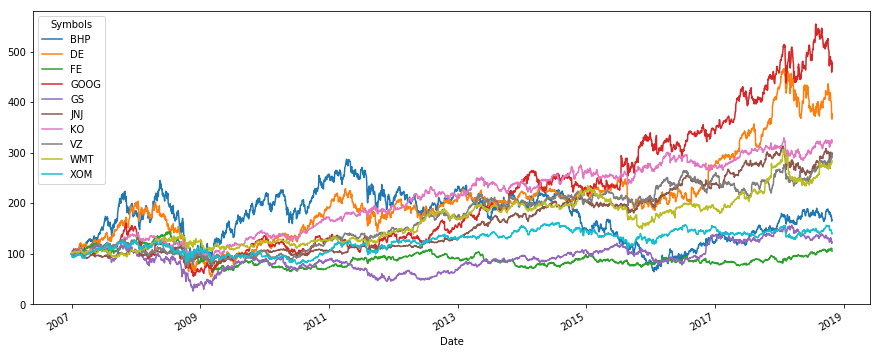

In [43]:
(data/data.iloc[0]*100).plot(figsize=(15,6))
plt.show()

In [6]:
returns_annual = np.log(data/data.shift(1))
returns_annual.mean()*252 # Get annual return. There are 252 trading days per year

Symbols
BHP     0.043267
DE      0.109995
FE      0.004241
GOOG    0.130711
GS      0.017354
JNJ     0.091726
KO      0.098502
VZ      0.090288
WMT     0.088228
XOM     0.028521
dtype: float64

In [14]:
cov = returns_annual.cov()*252
cov

Symbols,BHP,DE,FE,GOOG,GS,JNJ,KO,VZ,WMT,XOM
Symbols,,,,,,,,,,
BHP,0.163680,0.085496,0.042232,0.051278,0.083389,0.028786,0.030106,0.037853,0.026675,0.064620
DE,0.085496,0.113175,0.030332,0.044247,0.066459,0.022182,0.021800,0.030515,0.019629,0.044060
FE,0.042232,0.030332,0.063028,0.021600,0.032216,0.018206,0.020291,0.023201,0.016767,0.030310
GOOG,0.051278,0.044247,0.021600,0.081444,0.052503,0.019414,0.019257,0.023904,0.017977,0.030568
GS,0.083389,0.066459,0.032216,0.052503,0.143698,0.027211,0.025914,0.034489,0.025092,0.045893
JNJ,0.028786,0.022182,0.018206,0.019414,0.027211,0.026368,0.015984,0.018086,0.014949,0.022399
KO,0.030106,0.021800,0.020291,0.019257,0.025914,0.015984,0.032230,0.018536,0.014630,0.021795
VZ,0.037853,0.030515,0.023201,0.023904,0.034489,0.018086,0.018536,0.045228,0.018417,0.026472
WMT,0.026675,0.019629,0.016767,0.017977,0.025092,0.014949,0.014630,0.018417,0.039498,0.019375


## Initialize the weights randomly

In [15]:
weights = np.random.random(num)
weights /= np.sum(weights)
weights

array([0.13027004, 0.11700707, 0.03677218, 0.04419812, 0.05147005,
       0.17035103, 0.06781074, 0.15063379, 0.09221529, 0.1392717 ])

## Calculate the expected annual return, variance, and standard deviation of the portfolio

In [16]:
portforlio_return = np.sum(returns_annual.mean()*weights)*252
var = np.dot(weights.T, np.dot(cov,weights))
sd = np.sqrt(var)

print("Expected annual return: {}".format(round(portforlio_return,4)))
print("Variance: {}".format(round(var,4)))
print("Standard deviation: {}".format(round(sd,4)))

Expected annual return: 0.0733
Variance: 0.0357
Standard deviation: 0.189


## Monte Carlo Simulation

* Monte Carlo creates hypothetical returns of a real portfolio
* Random portfolios are hypothetical portfolios using real asset returns

We use Monte Carlo Simulation to run 10,000 different randomly generated weights for the individual stocks and then calculate the expected return, expected volatility and Sharpe Ratio for each of the randomly generated portfolios.

[0.07416129 0.0569945  0.06742786 ... 0.07447995 0.05774842 0.06439114]


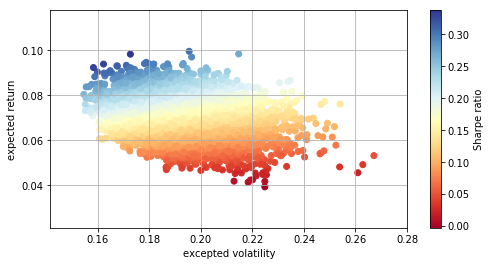

In [25]:
port_returns = []
port_variance = []

for p in range (10000):
    weights = np.random.random(num)
    weights /= np.sum(weights)
    
    port_returns.append((np.sum(returns_annual.mean()*weights))*252)
    port_variance.append(np.sqrt(np.dot(weights.T, np.dot(returns_annual.cov()*252, weights))))
port_returns = np.array(port_returns)
port_variance = np.array(port_variance)
risk_free = 0.04
sharpe = (port_returns-risk_free)/port_variance

plt.figure(figsize = (8,4))
plt.scatter(port_variance, port_returns, c = sharpe, cmap = 'RdYlBu')
plt.grid(True)
plt.xlabel('excepted volatility')
plt.ylabel('expected return')
plt.colorbar(label = 'Sharpe ratio')


plt.show()

In [26]:
print(port_returns)
print(port_variance)

[0.07416129 0.0569945  0.06742786 ... 0.07447995 0.05774842 0.06439114]
[0.18059707 0.18475687 0.19272783 ... 0.2019903  0.18564473 0.19619479]


## Optimization 1: Maximize the Sharpe Ratio
* Constraint: weight sum = 1

In [18]:
def statistics(weights):
    weights = np.array(weights)
    port_returns = np.sum(returns_annual.mean()*weights)*252
    port_variance = np.sqrt(np.dot(weights.T, np.dot(returns_annual.cov()*252,weights)))
    return np.array([port_returns, port_variance, port_returns/port_variance])

# 
def min_sharpe(weights):
    return -statistics(weights)[2]

# set constraint: sum of fraction = 1
cons = ({'type':'eq', 'fun':lambda x: np.sum(x)-1}) 

# set fraction between 0-1
bnds = tuple((0,1) for x in range(num))

# Optimization of Sharpe Ratio
opts = sco.minimize(min_sharpe, 
                    num*[1./num,], 
                    method = 'SLSQP', 
                    bounds = bnds, 
                    constraints = cons)
opts

     fun: -0.6739249342466042
     jac: array([ 7.15718232e-01,  3.50163579e-02,  5.70699699e-01, -1.05291605e-04,
        8.28640260e-01,  2.72765756e-05,  4.14028764e-05,  2.58490443e-04,
       -7.83577561e-05,  5.23337811e-01])
 message: 'Optimization terminated successfully.'
    nfev: 96
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([0.        , 0.        , 0.        , 0.14997834, 0.        ,
       0.35128145, 0.31961515, 0.02082911, 0.15829595, 0.        ])

In [19]:
# Optimal weights of the stocks when maximizing the Sharpe Ratio
opts_weights = opts['x'].round(3)
print('Optimal weights of the stocks when maximizing the Sharpe Ratio:')
print(opts_weights)

Optimal weights of the stocks when maximizing the Sharpe Ratio:
[0.    0.    0.    0.15  0.    0.351 0.32  0.021 0.158 0.   ]


In [20]:
# E(R), stdev, Sharpe Ratio when maximizing the Sharpe Ratio
opts_stats = statistics(opts['x']).round(3)
print('The Expected Return of the Portfolio is {},\
Expected Volatility is {} and Sharpe Ratio is {} \
when maximizing the Sharpe Ratio'.\
format(opts_stats[0],opts_stats[1],opts_stats[2]))



The Expected Return of the Portfolio is 0.099,Expected Volatility is 0.147 and Sharpe Ratio is 0.674 when maximizing the Sharpe Ratio


# Optimization 2: Minimize Risk (Variance)

In [21]:
def min_variance(weights):
    return statistics(weights)[1]

optv = sco.minimize(min_variance, 
                    num*[1./num,],
                    method = 'SLSQP', 
                    bounds = bnds, 
                    constraints = cons)
optv

     fun: 0.14258511601867668
     jac: array([0.21070991, 0.15893042, 0.14288525, 0.141939  , 0.19217491,
       0.14252554, 0.14283977, 0.14246307, 0.14241202, 0.15607512])
 message: 'Optimization terminated successfully.'
    nfev: 157
     nit: 13
    njev: 13
  status: 0
 success: True
       x: array([2.44017032e-17, 0.00000000e+00, 3.33549797e-02, 1.34119773e-02,
       0.00000000e+00, 4.14422147e-01, 2.63535507e-01, 6.65071243e-02,
       2.08768265e-01, 0.00000000e+00])

In [22]:
# Optimal weights of the stocks when minimizing the risk
optv_weights = optv['x'].round(3)
print('Optimal weights of the stocks when minimizing the risk:')
print(optv_weights)

Optimal weights of the stocks when minimizing the risk:
[0.    0.    0.033 0.013 0.    0.414 0.264 0.067 0.209 0.   ]


In [23]:
# E(R), vol, Sharpe Ratio when minimizing the risk
optv_stats = statistics(optv['x']).round(3)
print('The Expected Return of the Portfolio is {}, \
Expected Volatility is {} and Sharpe Ratio is {} \
when minimizing the risk'.\
format(optv_stats[0],optv_stats[1],optv_stats[2]))


The Expected Return of the Portfolio is 0.09, Expected Volatility is 0.143 and Sharpe Ratio is 0.633 when minimizing the risk


## Efficient Frontier

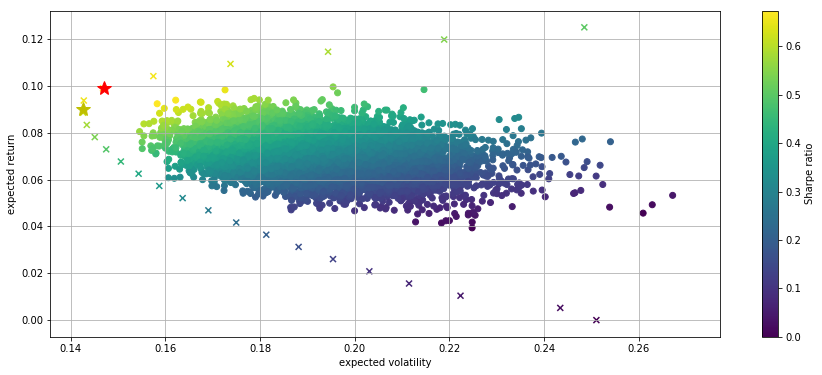

In [28]:
def min_variance(weights):
    return statistics(weights)[1]

#在不同目标收益率水平（target_returns）循环时，最小化的一个约束条件会变化。

target_returns = np.linspace(0.0,0.125,25)

target_variance = []
for tar in target_returns:
    cons = ({'type':'eq','fun':lambda x:statistics(x)[0]-tar},{'type':'eq','fun':lambda x:np.sum(x)-1})
    res = sco.minimize(min_variance, num*[1./num,],method = 'SLSQP', bounds = bnds, constraints = cons)
    target_variance.append(res['fun'])
target_variance = np.array(target_variance)

plt.figure(figsize = (15,6))
#plot efficient frontier
plt.scatter(port_variance, port_returns, c = port_returns/port_variance,marker = 'o') #sharpe
plt.scatter(target_variance,target_returns, c = target_returns/target_variance, marker = 'x') #risk
#Red star represents the portfolio when maximizing the sharpe ratio
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0], 'r*', markersize = 15.0)
#Yellow star represents the portfolio when minimizing the risk
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0], 'y*', markersize = 15.0)

plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label = 'Sharpe ratio')
plt.show()